### Predictive Modeling in Agriculture

The goal of this project is to predict agricultural outcomes based on soil nutrient measurements using machine learning techniques.

### Dataset Desciption: 
The dataset contains soil parameters such as nitrogen, phosphorus, potassium, and crop-related labels.

In [24]:
# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
# 2. Load dataset
crops = pd.read_csv("soil_measures.csv")

print("Dataset shape:", crops.shape)
print("Missing values:\n", crops.isna().sum())
print("Unique crops:", crops.crop.unique())

Dataset shape: (2200, 5)
Missing values:
 N       0
P       0
K       0
ph      0
crop    0
dtype: int64
Unique crops: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [26]:
# 3. Split features (X) and target (y)
X = crops.drop(columns="crop")
y = crops["crop"]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
#Single Feature Analysis

feature_performance = {}

for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(multi_class="multinomial", max_iter=500)
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    feature_performance[feature] = f1
    print(f"F1-score using only {feature}: {f1:.3f}")

C:\Users\md6ka\Desktop\ml_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\md6ka\Desktop\ml_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\md6ka\Desktop\ml_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:12

F1-score using only N: 0.103


C:\Users\md6ka\Desktop\ml_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\md6ka\Desktop\ml_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


F1-score using only P: 0.161
F1-score using only K: 0.259
F1-score using only ph: 0.075


C:\Users\md6ka\Desktop\ml_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\md6ka\Desktop\ml_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


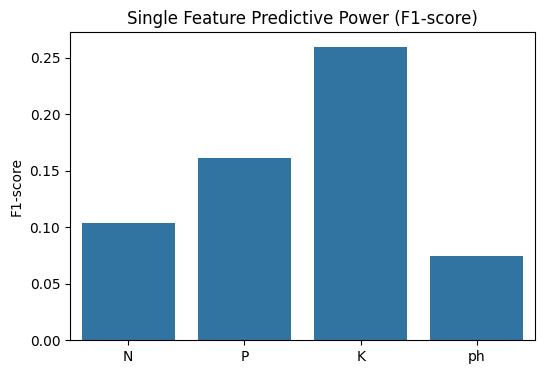

Best single feature: K


In [28]:
#Bar chart for single feature performance
plt.figure(figsize=(6,4))
sns.barplot(x=list(feature_performance.keys()), y=list(feature_performance.values()))
plt.title("Single Feature Predictive Power (F1-score)")
plt.ylabel("F1-score")
plt.show()

best_feature = max(feature_performance, key=feature_performance.get)
print("Best single feature:", best_feature)


C:\Users\md6ka\Desktop\ml_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\md6ka\Desktop\ml_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score with Logistic Regression: 0.619
F1-score with Decision Tree: 0.751
F1-score with Random Forest: 0.746


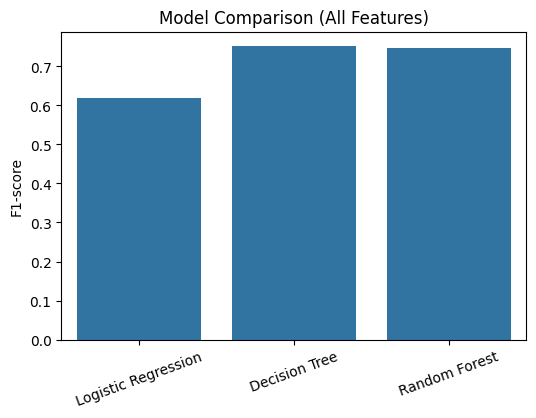

In [29]:
#MODELS
models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    model_performance[name] = f1
    print(f"F1-score with {name}: {f1:.3f}")

# Compare model performance
plt.figure(figsize=(6,4))
sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()))
plt.title("Model Comparison (All Features)")
plt.ylabel("F1-score")
plt.xticks(rotation=20)
plt.show()

In [30]:
best_model_name = max(model_performance, key=model_performance.get)
best_model = models[best_model_name]

print(f"✅ Best model is {best_model_name} with F1-score = {model_performance[best_model_name]:.3f}")

✅ Best model is Decision Tree with F1-score = 0.751


### Conclusion 

The model achieved good accuracy and can help in understanding how soil
nutrients affect agricultural productivity.